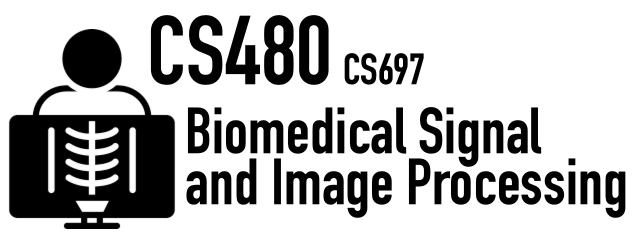
#Assignment 5

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
import numpy as np
import matplotlib

In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs480.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# The total of slices are 220. Because there are 220 .dcm inside CT folder 

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

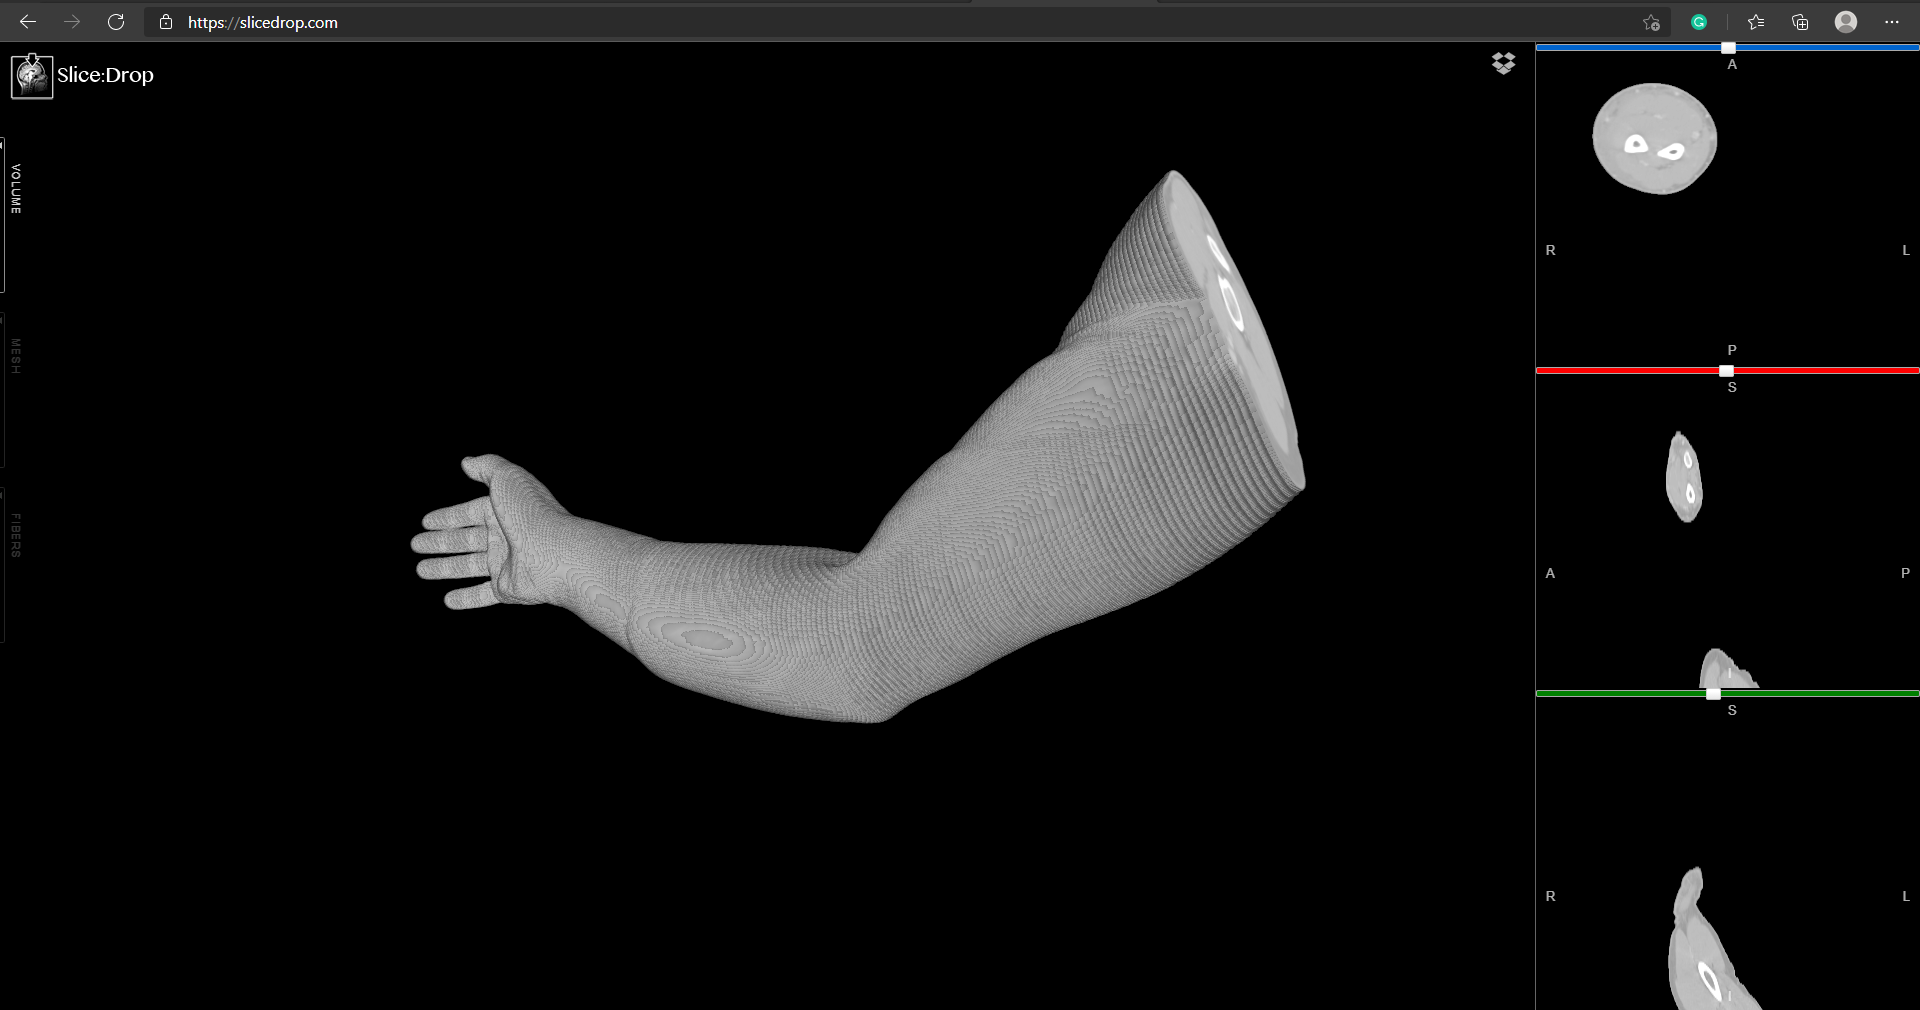

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [3]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [4]:
from pydicom import dcmread
import os
from operator import itemgetter
from matplotlib import pyplot as plt

In [82]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
slices = []
all_files = sorted(os.listdir('ct'))
for i in range(len(all_files)):
  files = dcmread('ct' + '/' +  all_files[i])
  slices.append(files)

imagings_shape = list(slices[0].pixel_array)
imagings_shape.append(len(slices))
data = np.zeros(imagings)

for i, slice in enumerate(slices):
  img = slice.pixel_array
  data[:, :, i] = img

print(np.shape(data))

(454, 512, 220)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

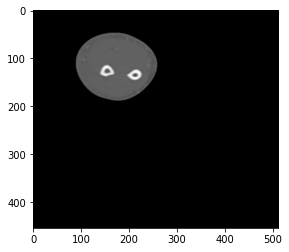

In [23]:
# TODO: YOUR CODE FOR AXIAL
axial = plt.imshow(data[:, :, 100], cmap='gray')

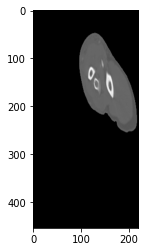

In [24]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal = plt.imshow(data[:, 100, :], cmap='gray')

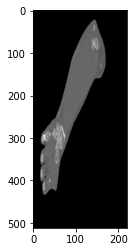

In [25]:
# TODO: YOUR CODE FOR CORONAL
coronal = plt.imshow(data[100, :, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

In [40]:
# TODO: YOUR CODE

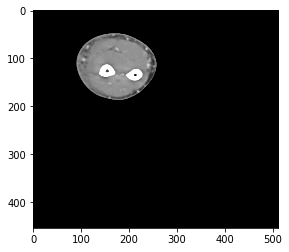

In [63]:
image_slice = dcmread('ct/' + all_files[100])
# Window Center
wind_center = image_slice[0x0028, 0x1050]
# Window width
wind_width = image_slice[0x0028, 0x1051]
# Rescale intercept
rescale_intercept = image_slice[0x0028, 0x1052]

level = image_slice['WindowCenter'].value
window = image_slice['WindowWidth'].value
rescale_intercept = image_slice['RescaleIntercept'].value

vmin = level - window/2
vmax = level + window/2

hu_pixels = image_slice.pixel_array
plt.imshow(hu_pixels + rescale_intercept, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

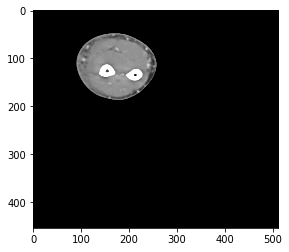

In [64]:
level0 = 100
window0 = 100

vmin=level - window/2
vmax=level + window/2

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

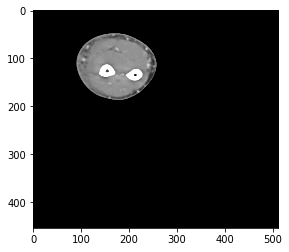

In [66]:
level1 = 70
window1 = 50

vmin=level - window/2
vmax=level + window/2

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


 vmin  	  : 35.0
 vmax  	  : 65.0


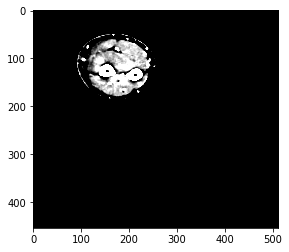

In [67]:
level = 50
window = 30

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


 vmin  	  : 25.0
 vmax  	  : 35.0


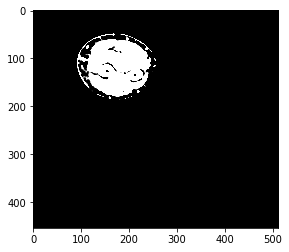

In [68]:
level = 30
window = 10

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()


 vmin  	  : 0.0
 vmax  	  : 200.0


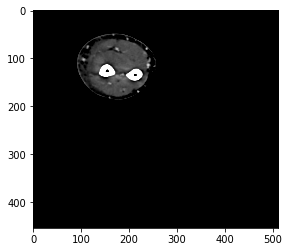

In [71]:
level = 100
window = 200

vmin=level - window/2
vmax=level + window/2
print("\n vmin  \t  :", vmin)
print(" vmax  \t  :", vmax)

plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

# I think the level of value is 100 and window value is 100

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

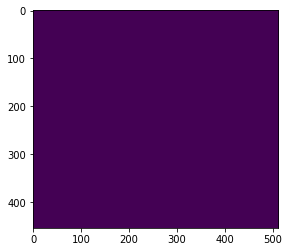

In [107]:
# TODO: YOUR CODE TO SEGMENT FAT
image = (data.copy()).astype(np.int16)
image[data < -70] = 0
image[data > -30] = 0
plt.imshow(image[:, :, 100])

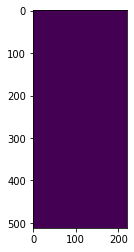

In [102]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
image = (data.copy()).astype(np.int16)
image[data < 40] = 0
image[data > 20] = 0
plt.imshow(image[100, :, :])

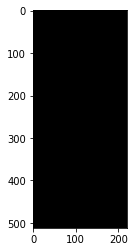

In [106]:
# TODO: YOUR CODE TO SEGMENT BONES
image = (data.copy()).astype(np.int16)
image[data < 1000] = 0
image[data > 20] = 0
plt.imshow(image[100, :, :], cmap = 'gray')

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: YOUR ANSWER
# my segmentation is not displayed the result as the statement shown.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""